Example in 21.5.1 Murphy book or 10.1.3 Bishop book
# Dataset

In [316]:
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.ast_node_interactivity = "last"

from __future__ import division
import numpy as np
import scipy as sp
import scipy.special
import scipy.stats
import math

In [317]:
mu_true, tau_true = 0, 1
N = 100
data = np.random.normal(mu_true, tau_true, N)
data[:10]

array([ 0.97600107, -0.70022378, -1.85818355,  1.8304213 ,  0.27345643,
       -1.04084643,  0.16063674, -0.25436052, -2.44696353, -2.28197049])

# Algorithm
Here we set the hyperparameters $\mu_0$, $\kappa_0$, $a_0$, $b_0$

In [318]:
a_0, b_0, mu_0, kappa_0 = 0, 0, 0, 0
m = np.mean(data)
truePost = dict()
truePost['mu'] = np.mean(data)
truePost['kappa'] = N
truePost['alpha'] = N/2
truePost['beta'] = 1 / 2 * np.sum((data - m)**2)

m
truePost

{'alpha': 50.0,
 'beta': 57.166256164571017,
 'kappa': 100,
 'mu': 0.011842919993999414}

Iterative main

In [319]:
# Initialize VB to fit univariate gaussian
a_N = 2.5; b_N = 1
mu_N = 0.5; kappa_N = 5;

Lbound = []
Lq = 0
max_iter = 1000
iter = 0
converged = False

while iter < max_iter and not converged:
    iter += 1
    Lq_old = Lq
    
    # Updating q(mu)
    E_lambda = a_N / b_N
    
    mu_N = (kappa_0 * mu_0 + N * m) / (kappa_0 + N)
    kappa_N = (kappa_0 + N) * E_lambda
#     print kappa_N
    
    # Updating q(lambda)
    E_mu = mu_N
    E_mu2 = 1/kappa_N + mu_N**2
    
    a_N = a_0 + (N+1) / 2
    b_N = b_0 + kappa_0 * (E_mu2 + mu_0**2 - 2 * E_mu * mu_0) + 1/2 * np.sum(data**2 + E_mu2 - 2 * E_mu * data)
#     b_N = b_0 + 1/2 * ((np.sum(data**2) + kappa_0 * mu_0**2) - 2 * E_mu *(np.sum(data) + kappa_0 * mu_0) + E_mu2*(kappa_0+N));
#     print b_N
    
    # Check the convergence of lower bound
    Lq = 1/2 * np.log(1/kappa_N) + sp.special.gammaln(a_N) - a_N * np.log(b_N)
    Lbound += [Lq]
    
    assert iter <=1 or Lq - Lq_old > -0.000001
        
    if iter > 1 and np.abs(Lq - Lq_old) < 0.000001:
        converged = True
    
converged
iter

4

# Plotting results

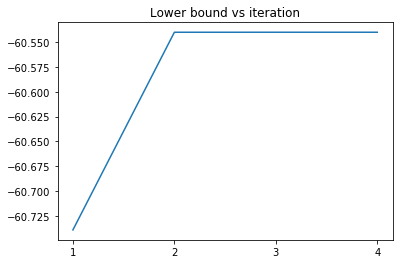

In [320]:
import matplotlib.pyplot as plt
from matplotlib import rc
from pylab import *

magic_cmds = """%matplotlib inline
"""

try:
    if (__IPYTHON__):
        for magic_cmd in magic_cmds.splitlines():
            get_ipython().magic(magic_cmd[1:])
except NameError:
    pass

plt.plot(np.arange(1,iter+1),Lbound)
xticks(np.arange(1,iter+1))
title('Lower bound vs iteration')

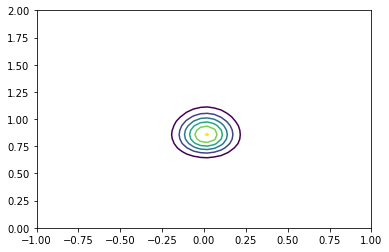

In [321]:
# delta = 0.25
# x = np.arange(-1, 1, delta)
# y = np.arange(0, 2, delta)
x = np.linspace(-1, 1, num=50)
y = np.linspace(0, 2, num=50)

X, Y = np.meshgrid(x, y)

q_mu = sp.stats.norm.pdf(X, mu_N, np.sqrt(1/kappa_N))
q_lambda = sp.stats.gamma.pdf(Y, a_N, 0, 1/b_N)
# np.size(q_mu), np.size(q_lambda)

Z = np.multiply(q_mu, q_lambda)
# np.size(Z,0)

plt.contour(X, Y, Z)
# xlim(-1/10,1/10)
# ylim(0.9,1.1)